In [1]:
import os
import json
import pickle

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
DUMP_DIR_1 = "/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfldv2/1/"
DUMP_DIR_2 = "/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfldv2_bs2048/1/"

use_split = "val"

logits_1_fn = os.path.join(DUMP_DIR_1, "logits", use_split, "logits.pt")
targets_1_fn = os.path.join(DUMP_DIR_1, "logits", use_split, "targets.pt")
config_1_fn = os.path.join(DUMP_DIR_1, "config.json")

logits_2_fn = os.path.join(DUMP_DIR_2, "logits", use_split, "logits.pt")
targets_2_fn = os.path.join(DUMP_DIR_2, "logits", use_split, "targets.pt")
config_2_fn = os.path.join(DUMP_DIR_2, "config.json")


In [27]:
logits_1 = torch.load(logits_1_fn)
targets_1 = torch.load(targets_1_fn)
with open(config_1_fn) as f:
    config_1 = json.load(f)
dt_1 = config_1["data"]["data_tag"]
    
    
logits_2 = torch.load(logits_2_fn)
targets_2 = torch.load(targets_2_fn)
with open(config_2_fn) as f:
    config_2 = json.load(f)
dt_2 = config_2["data"]["data_tag"]



In [28]:
settings = {
    dt_1: {
        "logits": logits_1,
        "targets": targets_1,
        "label": "v2"
    },
    dt_2: {
        "logits": logits_2,
        "targets": targets_2,
        "label": "v2-2048"
    }
}

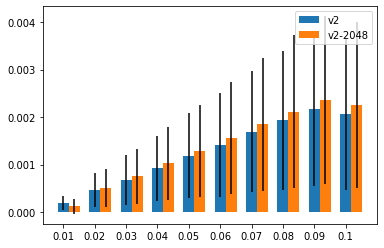

In [29]:
plt.figure()

bincenters = np.round(np.arange(0.01, 0.11, 0.01), 2)
w=0.35
si = 0

data = list()

for sett in settings:
    setting = settings[sett]
    logits = setting["logits"]
    targets = setting["targets"]
    diff = np.linalg.norm(logits - targets, axis=1, ord=2)
    gt_distances = torch.min(targets, dim=1)[0]
    
    

    x_ticks = np.round(np.arange(0.01, 0.11, 0.01), 2)
    
    y_vals = np.zeros(x_ticks.shape[0])
    y_err = np.zeros(x_ticks.shape[0])
    for i in range(x_ticks.shape[0]):
        lvalue = x_ticks[i - 1]
        rvalue = x_ticks[i]
        if i == 0:
            lvalue = 0
        in_range_diffs = diff[(gt_distances > lvalue) & (gt_distances < rvalue)]
        for j in range(in_range_diffs.shape[0]):
            data.append([x_ticks[i], in_range_diffs[j], settings[sett]["label"]])
        
        y_vals[i] = np.mean(in_range_diffs)
        y_err[i] = np.std(in_range_diffs)
    
    
    plt.bar(x=np.arange(x_ticks.shape[0]) + (si * w), height=y_vals.tolist(), yerr=y_err, width=w, label=settings[sett]["label"])
    
    si+=1
    
plt.xticks(ticks=np.arange(x_ticks.shape[0]), labels=x_ticks)
plt.legend()
plt.show()
#     plt.bar()
    

In [25]:
df.boxplot(columns["diff"], by=["eps"])

,eps,diff,run
0,0.01,0.000663,v3-2048
1,0.01,0.000205,v3-2048
2,0.01,0.000216,v3-2048
3,0.01,0.000617,v3-2048
4,0.01,0.000010,v3-2048
...,...,...,...
137571,0.10,0.004360,v3-2048
137572,0.10,0.000028,v3-2048
137573,0.10,0.001265,v3-2048
137574,0.10,0.002793,v3-2048


9 [ 2.25  4.25  6.25  8.25 10.25 12.25 14.25 16.25 18.25 20.25]
9 [ 2.25  4.25  6.25  8.25 10.25 12.25 14.25 16.25 18.25 20.25]
9 [ 2.25  4.25  6.25  8.25 10.25 12.25 14.25 16.25 18.25 20.25]
9 [ 2.25  4.25  6.25  8.25 10.25 12.25 14.25 16.25 18.25 20.25]


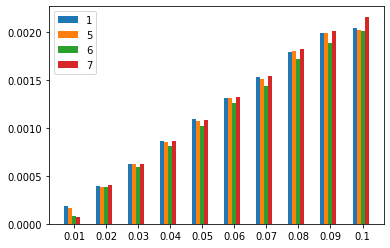

In [39]:
DUMP_DIR = "/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n500_noninfdist_moreoffmfld_bs2048_lr_tuning/"
use_split = "test"
plt.figure()
runs = ["1", "5", "6", "7"]

w = 1.0 / len(runs)
mid = len(runs) // 2

for j in range(len(runs)):
    
    run = runs[j]
    run_dir = os.path.join(DUMP_DIR, run)
    
    logits_fn = os.path.join(run_dir, "logits", use_split, "logits.pt")
    targets_fn = os.path.join(run_dir, "logits", use_split, "targets.pt")
    config_fn = os.path.join(run_dir, "config.json")
    
    logits = torch.load(logits_fn)
    targets = torch.load(targets_fn)
    with open(config_fn) as f:
        config = json.load(f)
    dt = config["data"]["data_tag"]
    
    settings = {
        dt: {
            "logits": logits,
            "targets": targets,
            "label": run
        }
    }
    
    
    diff = np.linalg.norm(logits - targets, axis=1, ord=2)
    gt_distances = torch.min(targets, dim=1)[0]
    
    print(i, np.arange(0, x_ticks.shape[0]*2, 2) + (i*w))

    x_ticks = np.round(np.arange(0.01, 0.11, 0.01), 2)
    
    y_vals = np.zeros(x_ticks.shape[0])
    y_err = np.zeros(x_ticks.shape[0])
    for i in range(x_ticks.shape[0]):
        lvalue = x_ticks[i - 1]
        rvalue = x_ticks[i]
        if i == 0:
            lvalue = 0
        in_range_diffs = diff[(gt_distances > lvalue) & (gt_distances < rvalue)]
        
        y_vals[i] = np.mean(in_range_diffs)
        y_err[i] = np.std(in_range_diffs)
    
    plt.bar(x=np.arange(0, x_ticks.shape[0]*2, 2) + (j * w) , height=y_vals.tolist(), width=w, label=settings[dt]["label"])
    
plt.xticks(ticks=np.arange(0, x_ticks.shape[0]*2, 2) + (mid*w), labels=x_ticks)
plt.legend()
plt.show()

0.25

In [11]:
np.arange(0, x_ticks.shape[0]*2, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])